# Part II - Prosper Dataset Explanation
## by El Mehdi Aliouan

## About the dataset
This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.


## Investigative Overview

The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations. In this presentation. Many visualizations on loans's characterics will be created to study their relationship on borrowers's APR.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv(r'C:\Users\ElMehdi\Downloads\Udacity_Communicatefindings\prosperLoanData.csv')

## How is the distribution of BorrowerAPR?

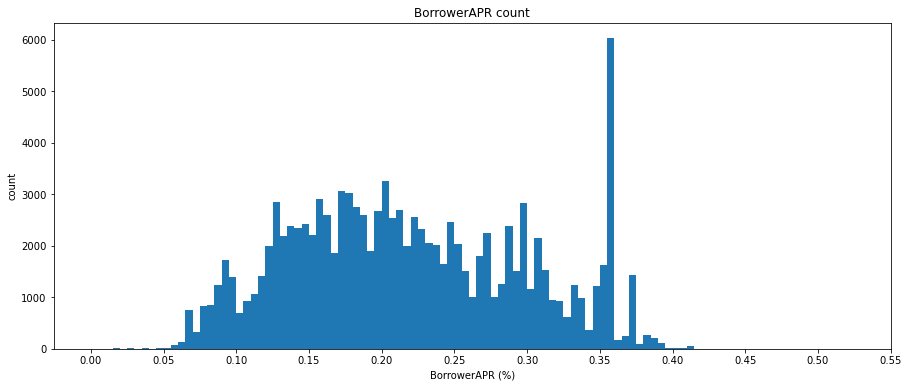

In [3]:
# see the counts for all BorrowerAPR values
plt.figure(figsize=(15, 6))

bins = np.arange(0, loan_df['BorrowerAPR'].max(), 0.005)
plt.hist(loan_df['BorrowerAPR'], bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.05));

Observing the counts for all BorrowerAPR values, the lowerest APR is at around 0.05% and the highested is at around 0.41%. Two high counts are found at 0.35797% and 0.35643%. Otherwise, the curver looks likes the bell curve.

## Correlation between the attributes

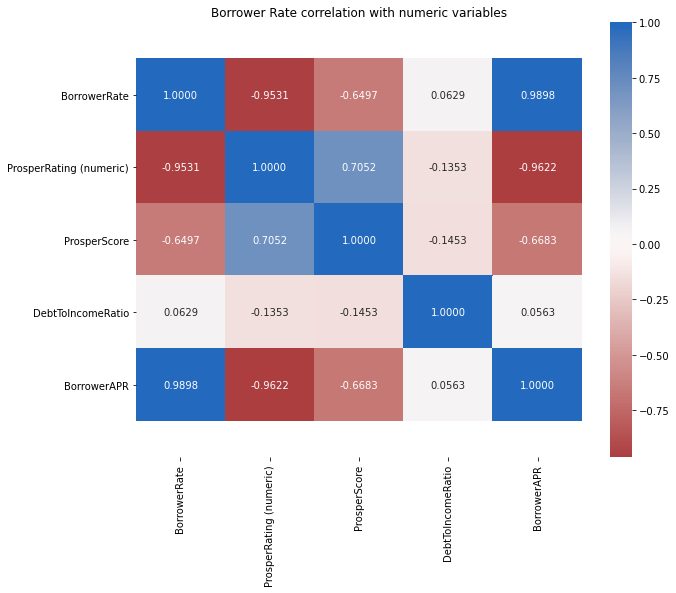

In [4]:
correlation_df = loan_df[['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'DebtToIncomeRatio','BorrowerAPR']]

# correlation plot 
plt.figure(figsize = [10, 8])
sb.heatmap(correlation_df.corr(), annot = True, fmt = '.4f',
           cmap = 'vlag_r', center = 0)
plt.title('Borrower Rate correlation with numeric variables')

#I could not see the complete matrix over here, hence got help via github
# Link- https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5
plt.ylim(bottom, top)
plt.yticks(rotation=0);
plt.show()

## Borrower rates vs. ProsperScore


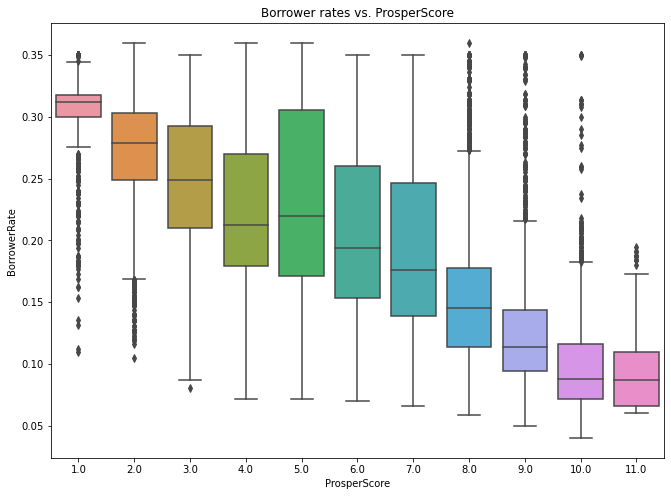

In [5]:
plt.figure(figsize=[11, 8]);
base_color = sb.color_palette()[3];
sb.boxplot(data = loan_df, x = 'ProsperScore', y = 'BorrowerRate');
plt.title('Borrower rates vs. ProsperScore');

Plot for BorrowerAPR vs. ProsperRating and BorrowerAPR vs ProsperScore:- For these two categorical variables, there is not much correlation on ProsperRating. Good or bad rating doesn't reflect the percentage of APR the borrower will get. For ProsperScore, there are clearly negative relationship with BorrowerAPR.

## ProsperScore vs BorrowerAPR


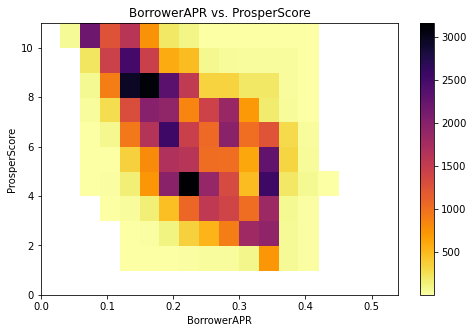

In [6]:
plt.figure(figsize=[8,5])
x= np.arange(0, loan_df['BorrowerAPR'].max()+0.05, 0.03)
y = np.arange(0, loan_df['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan_df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [x, y], 
               cmap = 'inferno_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

## Relationships observed

ProsperScore has stronger relationship with BorrowerAPR (negative correlated).By performing Bi-variate Exploration, it is more clearly to gain more understanding and answer questions about BorrowerAPR.

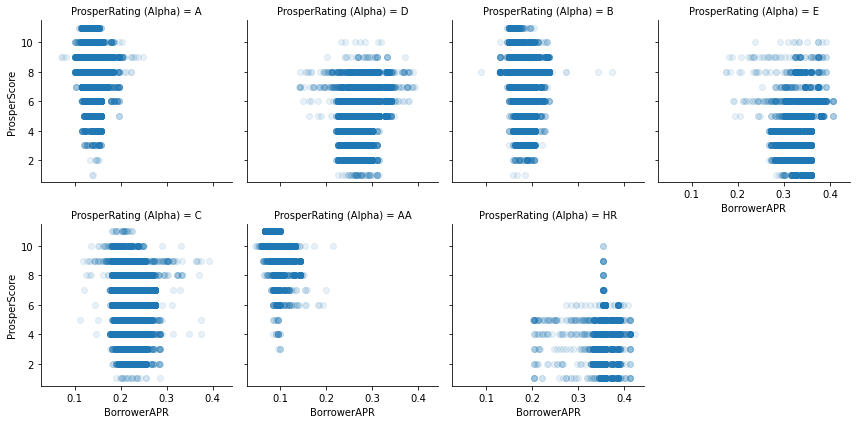

In [7]:
grid = sb.FacetGrid(data = loan_df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
grid.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
grid.set_xlabels('BorrowerAPR')
grid.set_ylabels('ProsperScore')

plt.show();

#### This grid helps to analyze BorrowerAPR vs ProsperScore on difference letter ratings. The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This visualization differenate groups of people in terms of APR received based on their rating and scores.

# Final Thoughts

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt